<a href="https://colab.research.google.com/github/SHAIK-MOHAMMAD-IRFAN27/VR-mini-project/blob/main/VR_TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#!pip install tensorflow


In [7]:
import tensorflow as tf
import os
import cv2
import imghdr
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,AveragePooling2D,Dropout, BatchNormalization
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau


ImportError: No module named 'cv2'

In [ ]:
data_dir="/content/drive/My Drive/FaceMaskDataset"

In [ ]:
os.listdir(data_dir)

In [ ]:
without_mask_dir = "/content/drive/My Drive/FaceMaskDataset/without_mask"
with_mask_dir = "/content/drive/My Drive/FaceMaskDataset/with_mask"

In [ ]:
without_mask_images=os.listdir(without_mask_dir)

In [ ]:
len(without_mask_images)

In [ ]:
with_mask_images=os.listdir(with_mask_dir)

In [ ]:
len(with_mask_images)

In [ ]:
image_path=os.path.join(without_mask_dir, without_mask_images[5])

In [ ]:
image = cv2.imread(image_path)

In [ ]:
cv2_imshow(image)

In [ ]:
image_path=os.path.join(with_mask_dir, with_mask_images[2])

In [ ]:
image = cv2.imread(image_path)

In [ ]:
cv2_imshow(image)

In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [ ]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)

In [ ]:
data

In [ ]:
type(data)

In [ ]:
data_iterator=data.as_numpy_iterator()

In [ ]:
batch=data_iterator.next()

In [ ]:
type(batch)

In [ ]:
(image,labels)=batch

In [ ]:
image.shape

In [ ]:
labels.shape

In [ ]:
len(batch)

In [ ]:
len(batch[0])

In [ ]:
len(batch[1])

In [ ]:
batch[0].shape

In [ ]:
batch[1].shape

In [ ]:
batch[0].max()

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
batch=data.as_numpy_iterator()

In [ ]:
batch=batch.next()

In [ ]:
len(batch)

In [ ]:
X = []
y = []

for img_batch, label_batch in data.as_numpy_iterator():
    X.extend(img_batch)  # Append images
    y.extend(label_batch)  # Append labels

X = np.array(X)  # Convert to NumPy arrays
y = np.array(y)  # Convert labels to NumPy array


In [ ]:
# Split into 70% train, 30% temp (which will be split further)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Split temp into 20% validation, 10% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)

# Print class distributions to verify equal split
print("Train class distribution:", np.bincount(y_train))
print("Validation class distribution:", np.bincount(y_val))
print("Test class distribution:", np.bincount(y_test))


In [ ]:
len(X_train),len(X_test),len(X_val)

In [ ]:

# Convert NumPy arrays back to TensorFlow datasets
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)


In [ ]:
len(train_ds)

In [ ]:
train_ds

In [ ]:
model = Sequential()

In [ ]:

model.add(Conv2D(32, (5,5), strides=1, activation='relu', input_shape=(256,256,3),kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (5,5), strides=1, activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2)))


model.add(Conv2D(128, (3,3), strides=1, activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), strides=1, activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)



model.summary()


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[lr_scheduler]
)


In [ ]:
# Load your test dataset
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_ds)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


In [ ]:
y_pred_probs = model.predict(test_ds)


In [ ]:
y_test

In [ ]:
y_pred = (y_pred_probs > 0.5).astype(int)


In [174]:
y_pred

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
    

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    batch_size=16,
)

In [ ]:
from tensorflow.keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, (5,5), strides=1, activation='relu', input_shape=(256,256,3),kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (5,5), strides=1, activation=LeakyReLU(alpha=0.1),kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2)))


model.add(Conv2D(128, (3,3), strides=1, activation=LeakyReLU(alpha=0.1),kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), strides=1, activation=LeakyReLU(alpha=0.1),kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512, activation=LeakyReLU(alpha=0.1)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)



model.summary()


In [179]:
y_pred.tolist()

[[1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1]

In [1]:
for elem in y_pred:
  print(elem)


NameError: name 'y_pred' is not defined

In [178]:
temp

array([], dtype=float64)

In [144]:
image_path = "/content/hpp.jpg"

In [145]:
from matplotlib import pyplot as plt

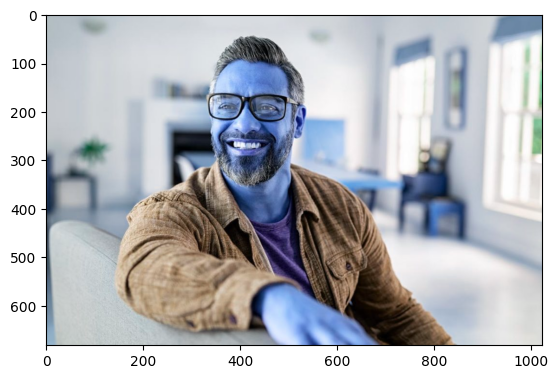

In [146]:
img = cv2.imread(image_path)
plt.imshow(img)
plt.show()

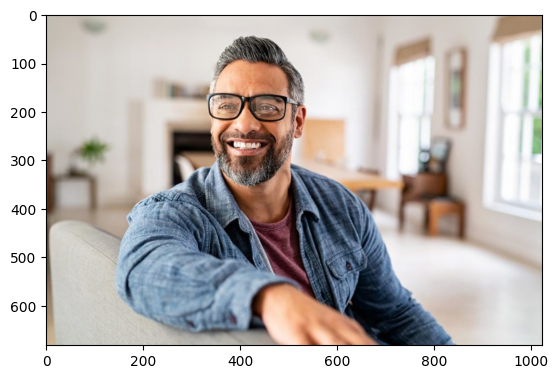

In [147]:
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image_rgb = image_rgb / 255.0
plt.imshow(image_rgb)
resize = tf.image.resize(image_rgb, (256,256))


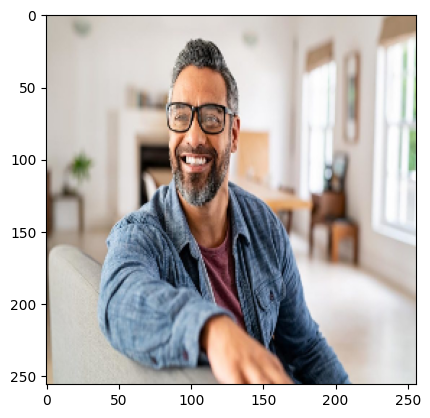

In [148]:
plt.imshow(resize)

In [149]:
resize.shape

TensorShape([256, 256, 3])

In [150]:
resize=np.expand_dims(resize,0)

In [151]:
resize.shape

(1, 256, 256, 3)

In [152]:
newpred=model.predict(resize)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


In [153]:
print("Prediction:", newpred)


Prediction: [[0.]]


In [154]:

# If it's a classification model, you might want to apply thresholding
pred_class = 1 if newpred[0] > 0.5 else 0  # Adjust threshold as needed
print("Predicted Class:", pred_class)

Predicted Class: 0
